In [2]:
import pandas as pd
import plotly.express as px  
import numpy as np  
import seaborn as sns 
import matplotlib.pylab as plt 

In [3]:
df = pd.read_csv(r"C:\Users\Maydoum\Downloads\Compressed\stores_sales_forecasting.csv" , encoding = "ISO-8859-1")

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

## EXplore dataset

In [5]:
df.head().T

,0,1,2,3,4
Row ID,1,2,4,6,11
Order ID,CA-2016-152156,CA-2016-152156,US-2015-108966,CA-2014-115812,CA-2014-115812
Order Date,11/8/2016,11/8/2016,10/11/2015,6/9/2014,6/9/2014
Ship Date,11/11/2016,11/11/2016,10/18/2015,6/14/2014,6/14/2014
Ship Mode,Second Class,Second Class,Standard Class,Standard Class,Standard Class
Customer ID,CG-12520,CG-12520,SO-20335,BH-11710,BH-11710
Customer Name,Claire Gute,Claire Gute,Sean O'Donnell,Brosina Hoffman,Brosina Hoffman
Segment,Consumer,Consumer,Consumer,Consumer,Consumer
Country,United States,United States,United States,United States,United States
City,Henderson,Henderson,Fort Lauderdale,Los Angeles,Los Angeles


In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [8]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
#rename coloumns
df.rename(columns = {'Row ID':'Row_ID','Order ID':'Order_ID','Order Date':'Order_Date','Ship Date':'Ship_Date',
                     'Ship Mode':'Ship_Mode','Customer ID':'Customer_ID','Customer Name':'Customer_Name',
                     'Segment':'Segment','Country':'Country','City':'City'}, inplace = True)
#lower case all coloumns
df.columns = df.columns.str.lower()


In [10]:
# conver order date and ship date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])       


In [11]:
#month year day 
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day


In [12]:
df.duplicated().sum()

0

In [13]:
orders_by_year= df.groupby('year')['order_id'].count().reset_index().sort_values(by = 'year' , ascending=False)

In [14]:
df['year'].value_counts()

2017    686
2016    562
2015    452
2014    421
Name: year, dtype: int64

In [15]:
px.line(orders_by_year, x="year", y="order_id", title="year distribution")

In [16]:
day_group = df.groupby('day')['order_id'].count().reset_index().sort_values(by = 'day' , ascending=False)


In [17]:
px.line(day_group, x="day", y="order_id", title="day distribution")

In [18]:
month_group = df.groupby('month')['order_id'].count().reset_index().sort_values(by = 'month' , ascending=False)


In [19]:
px.line(month_group, x="month", y="order_id", title="month distribution")

In [20]:
df.head().T

,0,1,2,3,4
row_id,1,2,4,6,11
order_id,CA-2016-152156,CA-2016-152156,US-2015-108966,CA-2014-115812,CA-2014-115812
order_date,2016-11-08 00:00:00,2016-11-08 00:00:00,2015-10-11 00:00:00,2014-06-09 00:00:00,2014-06-09 00:00:00
ship_date,2016-11-11 00:00:00,2016-11-11 00:00:00,2015-10-18 00:00:00,2014-06-14 00:00:00,2014-06-14 00:00:00
ship_mode,Second Class,Second Class,Standard Class,Standard Class,Standard Class
customer_id,CG-12520,CG-12520,SO-20335,BH-11710,BH-11710
customer_name,Claire Gute,Claire Gute,Sean O'Donnell,Brosina Hoffman,Brosina Hoffman
segment,Consumer,Consumer,Consumer,Consumer,Consumer
country,United States,United States,United States,United States,United States
city,Henderson,Henderson,Fort Lauderdale,Los Angeles,Los Angeles


In [21]:
df['day_Ship'] = df['ship_date'].dt.day
df['month_Ship'] = df['ship_date'].dt.month
df['year_Ship'] = df['ship_date'].dt.year
df.head().T

,0,1,2,3,4
row_id,1,2,4,6,11
order_id,CA-2016-152156,CA-2016-152156,US-2015-108966,CA-2014-115812,CA-2014-115812
order_date,2016-11-08 00:00:00,2016-11-08 00:00:00,2015-10-11 00:00:00,2014-06-09 00:00:00,2014-06-09 00:00:00
ship_date,2016-11-11 00:00:00,2016-11-11 00:00:00,2015-10-18 00:00:00,2014-06-14 00:00:00,2014-06-14 00:00:00
ship_mode,Second Class,Second Class,Standard Class,Standard Class,Standard Class
customer_id,CG-12520,CG-12520,SO-20335,BH-11710,BH-11710
customer_name,Claire Gute,Claire Gute,Sean O'Donnell,Brosina Hoffman,Brosina Hoffman
segment,Consumer,Consumer,Consumer,Consumer,Consumer
country,United States,United States,United States,United States,United States
city,Henderson,Henderson,Fort Lauderdale,Los Angeles,Los Angeles


In [22]:
day_Ship_group = df.groupby('day_Ship')['order_id'].count().reset_index().sort_values(by = 'day_Ship' , ascending=False)

In [23]:
px.line(day_Ship_group, x="day_Ship", y="order_id", title="day_Ship distribution")

In [24]:
month_Ship_group = df.groupby('month_Ship')['order_id'].count().reset_index().sort_values(by = 'month_Ship' , ascending=False)
px.line(month_Ship_group, x="month_Ship", y="order_id", title="month_Ship distribution")

In [25]:
year_Ship_group = df.groupby('year_Ship')['order_id'].count().reset_index().sort_values(by = 'year_Ship' , ascending=False)

px.line(year_Ship_group, x="year_Ship", y="order_id", title="year_Ship distribution")

In [26]:
df['ship_mode'].value_counts()

Standard Class    1248
Second Class       427
First Class        327
Same Day           119
Name: ship_mode, dtype: int64

In [27]:
px.bar(df['ship_mode'].value_counts(), x=df['ship_mode'].value_counts().index, y=df['ship_mode'].value_counts().values)

In [28]:
df.head().T

,0,1,2,3,4
row_id,1,2,4,6,11
order_id,CA-2016-152156,CA-2016-152156,US-2015-108966,CA-2014-115812,CA-2014-115812
order_date,2016-11-08 00:00:00,2016-11-08 00:00:00,2015-10-11 00:00:00,2014-06-09 00:00:00,2014-06-09 00:00:00
ship_date,2016-11-11 00:00:00,2016-11-11 00:00:00,2015-10-18 00:00:00,2014-06-14 00:00:00,2014-06-14 00:00:00
ship_mode,Second Class,Second Class,Standard Class,Standard Class,Standard Class
customer_id,CG-12520,CG-12520,SO-20335,BH-11710,BH-11710
customer_name,Claire Gute,Claire Gute,Sean O'Donnell,Brosina Hoffman,Brosina Hoffman
segment,Consumer,Consumer,Consumer,Consumer,Consumer
country,United States,United States,United States,United States,United States
city,Henderson,Henderson,Fort Lauderdale,Los Angeles,Los Angeles


In [29]:
df['segment'].value_counts()

Consumer       1113
Corporate       646
Home Office     362
Name: segment, dtype: int64

In [30]:
px.bar(df['segment'].value_counts(), x=df['segment'].value_counts().index, y=df['segment'].value_counts().values)

In [31]:
city_group = df.groupby('city')['order_id'].count().reset_index().sort_values(by = 'order_id' , ascending=False).head(10)

px.bar(city_group, x="city", y="order_id", title="city distribution" , template="plotly_dark")

In [32]:
state_group = df.groupby('state')['order_id'].count().reset_index().sort_values(by = 'order_id' , ascending=False).head(10)

px.bar(state_group, x="state", y="order_id", title="state distribution" , template="plotly_dark")

In [33]:
df['region'].value_counts()

West       707
East       601
Central    481
South      332
Name: region, dtype: int64

In [34]:
px.bar(df['region'].value_counts(), x=df['region'].value_counts().index, y=df['region'].value_counts().values , template="plotly_dark") 

In [35]:
df.head().T

,0,1,2,3,4
row_id,1,2,4,6,11
order_id,CA-2016-152156,CA-2016-152156,US-2015-108966,CA-2014-115812,CA-2014-115812
order_date,2016-11-08 00:00:00,2016-11-08 00:00:00,2015-10-11 00:00:00,2014-06-09 00:00:00,2014-06-09 00:00:00
ship_date,2016-11-11 00:00:00,2016-11-11 00:00:00,2015-10-18 00:00:00,2014-06-14 00:00:00,2014-06-14 00:00:00
ship_mode,Second Class,Second Class,Standard Class,Standard Class,Standard Class
customer_id,CG-12520,CG-12520,SO-20335,BH-11710,BH-11710
customer_name,Claire Gute,Claire Gute,Sean O'Donnell,Brosina Hoffman,Brosina Hoffman
segment,Consumer,Consumer,Consumer,Consumer,Consumer
country,United States,United States,United States,United States,United States
city,Henderson,Henderson,Fort Lauderdale,Los Angeles,Los Angeles


In [36]:
df['sub-category'].value_counts()

Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: sub-category, dtype: int64

In [37]:
px.bar(df['sub-category'].value_counts(), x=df['sub-category'].value_counts().index,
        y=df['sub-category'].value_counts().values 
       , template="plotly_dark")

In [38]:
df.head().T

,0,1,2,3,4
row_id,1,2,4,6,11
order_id,CA-2016-152156,CA-2016-152156,US-2015-108966,CA-2014-115812,CA-2014-115812
order_date,2016-11-08 00:00:00,2016-11-08 00:00:00,2015-10-11 00:00:00,2014-06-09 00:00:00,2014-06-09 00:00:00
ship_date,2016-11-11 00:00:00,2016-11-11 00:00:00,2015-10-18 00:00:00,2014-06-14 00:00:00,2014-06-14 00:00:00
ship_mode,Second Class,Second Class,Standard Class,Standard Class,Standard Class
customer_id,CG-12520,CG-12520,SO-20335,BH-11710,BH-11710
customer_name,Claire Gute,Claire Gute,Sean O'Donnell,Brosina Hoffman,Brosina Hoffman
segment,Consumer,Consumer,Consumer,Consumer,Consumer
country,United States,United States,United States,United States,United States
city,Henderson,Henderson,Fort Lauderdale,Los Angeles,Los Angeles


In [39]:
px.box(df , x = 'sales' , template='plotly_dark' , color_discrete_sequence=px.colors.sequential.Electric_r)

In [40]:
df['quantity'].value_counts()

3     534
2     503
5     253
4     247
1     193
6     121
7     115
9      58
8      58
10     12
14      8
11      8
12      6
13      5
Name: quantity, dtype: int64

In [41]:
px.histogram(df , x = 'quantity' , template='plotly_dark' ,
              color_discrete_sequence=px.colors.sequential.Electric_r)

In [42]:
df['discount'].value_counts()

0.00    836
0.20    615
0.30    222
0.60    138
0.10     76
0.40     75
0.50     54
0.15     52
0.32     27
0.70     15
0.45     11
Name: discount, dtype: int64

In [43]:
px.histogram(df , x = 'discount' , template='plotly_dark' ,
              color_discrete_sequence=px.colors.sequential.Electric_r)

In [44]:
px.box(df , x = 'sales')

In [45]:
# Ensure that bins are in increasing order
bins = [1.892,  47.7748,182.22, 1000.127]  # All values must be in increasing order
labels = ['low', 'medium', 'high']

# Apply pd.cut to categorize the 'sales' column
df['sales_category'] = pd.cut(df['sales'], bins=bins, labels=labels)

# Create a pie chart using Plotly Express
fig = px.pie(df, names='sales_category', 
             template='plotly_dark', 
            hole=0.4, title='sales distribution',color_discrete_sequence=px.colors.sequential.Electric_r)

# Show the pie chart
fig.show()


## bivarite

In [46]:
px.bar(df.groupby('ship_mode')['sales'].mean().reset_index(), x="ship_mode", y="sales", title=
       "ship_mode vs sales", color_discrete_sequence=px.colors.sequential.Electric_r , template="plotly_dark")

In [47]:
px.bar(df.groupby('segment')['sales'].mean().reset_index(), x="segment", y="sales", title=
       "segment vs sales", color_discrete_sequence=px.colors.sequential.Electric_r , template="plotly_dark")

In [48]:


city_profit_group = df.groupby('city')['sales'].mean().reset_index()

top_cities = city_profit_group.sort_values(by='sales', ascending=False).head(10)
fig = px.bar(top_cities, 
             x='city', 
             y='sales', 
             title='Top 10 Cities by mean sales', 
             labels={'sales': ' sales', 'city': 'City'},
             template='plotly_dark',
             color='sales',  
             color_discrete_sequence=px.colors.sequential.Electric_r) 

fig.show()


In [49]:
#profit vs state 
state_profit_group = df.groupby('state')['sales'].mean().reset_index()

top_cities = state_profit_group.sort_values(by='sales', ascending=False).head(10)
fig = px.bar(top_cities, 
             x='state', 
             y='sales', 
             title='Top 10 states by mean sales', 
             labels={'sales': ' sales', 'state': 'State'},
             template='plotly_dark',
             color='sales',  
             color_discrete_sequence=px.colors.sequential.Electric_r) 

fig.show()


In [50]:
#profit vs region 
px.bar(df.groupby('region')['sales'].sum().reset_index(), x="sales", y="region", title=
       "region vs sales", color_discrete_sequence=px.colors.sequential.Electric_r , template="plotly_dark")

In [51]:
#profit vs sub_category
px.bar(df.groupby('sub-category')['sales'].mean().reset_index(), x="sub-category", y="sales", title=
       "sub_category vs sales", color_discrete_sequence=px.colors.sequential.Electric_r , template="plotly_dark")

In [52]:
px.line(df.groupby('sales')['profit'].mean().reset_index().sort_values(by='sales'), x="sales", y="profit", title=
       "order_datsales vs profit", color_discrete_sequence=px.colors.sequential.Electric_r , template="plotly_dark")

In [53]:
px.line(df.groupby('year')['sales'].mean().reset_index().sort_values(by='year'), x="year", y="sales", title=
       "sales vs year", color_discrete_sequence=px.colors.sequential.Electric_r , template="plotly_dark")

In [54]:
px.line(df.groupby('day')['sales'].mean().reset_index().sort_values(by='day'), x="day", y="sales", title=
       "sales vs month", color_discrete_sequence=px.colors.sequential.Electric_r , template="plotly_dark")

In [55]:
px.line(df.groupby('month')['sales'].mean().reset_index().sort_values(by='month'), x="month", y="sales", title=
       "sales vs month", color_discrete_sequence=px.colors.sequential.Electric_r , template="plotly_dark")

In [56]:
#sales vs quntity

px.line(df.groupby('quantity')['sales'].sum().reset_index().sort_values(by='quantity'), x="quantity", y="sales", title=
       "sales vs quantity", color_discrete_sequence=px.colors.sequential.Electric_r , template="plotly_dark")

In [57]:
## sales vs discount

px.line(df.groupby('discount')['sales'].sum().reset_index().sort_values(by='discount'), x="discount", y="sales", title=
       "sales vs discount", color_discrete_sequence=px.colors.sequential.Electric_r , template="plotly_dark")


## multivarite

In [58]:
df.head().T

,0,1,2,3,4
row_id,1,2,4,6,11
order_id,CA-2016-152156,CA-2016-152156,US-2015-108966,CA-2014-115812,CA-2014-115812
order_date,2016-11-08 00:00:00,2016-11-08 00:00:00,2015-10-11 00:00:00,2014-06-09 00:00:00,2014-06-09 00:00:00
ship_date,2016-11-11 00:00:00,2016-11-11 00:00:00,2015-10-18 00:00:00,2014-06-14 00:00:00,2014-06-14 00:00:00
ship_mode,Second Class,Second Class,Standard Class,Standard Class,Standard Class
customer_id,CG-12520,CG-12520,SO-20335,BH-11710,BH-11710
customer_name,Claire Gute,Claire Gute,Sean O'Donnell,Brosina Hoffman,Brosina Hoffman
segment,Consumer,Consumer,Consumer,Consumer,Consumer
country,United States,United States,United States,United States,United States
city,Henderson,Henderson,Fort Lauderdale,Los Angeles,Los Angeles


In [59]:
px.bar(df.groupby(['quantity' , 'sub-category'])['sales'].mean().reset_index().sort_values(by='sales') ,
    x = 'quantity' , y = 'sales' , color='sub-category' , color_discrete_sequence=px.colors.sequential.Electric_r , title= 'sub-category vs sales vs quantity' , 
     barmode='group' , template='plotly_dark' )

## machine learning model

### drop columns


In [60]:
df_machine = df.copy()

In [61]:
df_machine.to_csv('machine_sales.csv', index=False)


In [62]:
df_machine.head().T

,0,1,2,3,4
row_id,1,2,4,6,11
order_id,CA-2016-152156,CA-2016-152156,US-2015-108966,CA-2014-115812,CA-2014-115812
order_date,2016-11-08 00:00:00,2016-11-08 00:00:00,2015-10-11 00:00:00,2014-06-09 00:00:00,2014-06-09 00:00:00
ship_date,2016-11-11 00:00:00,2016-11-11 00:00:00,2015-10-18 00:00:00,2014-06-14 00:00:00,2014-06-14 00:00:00
ship_mode,Second Class,Second Class,Standard Class,Standard Class,Standard Class
customer_id,CG-12520,CG-12520,SO-20335,BH-11710,BH-11710
customer_name,Claire Gute,Claire Gute,Sean O'Donnell,Brosina Hoffman,Brosina Hoffman
segment,Consumer,Consumer,Consumer,Consumer,Consumer
country,United States,United States,United States,United States,United States
city,Henderson,Henderson,Fort Lauderdale,Los Angeles,Los Angeles


In [63]:
df_machine.drop(columns=['row_id', 'order_id', 'order_date', 'ship_date',
                         'postal code', 'product name', 'sales_category',
                         'customer_name', 'customer_id' , 'product id'
                           , 'category' , 'country'], inplace=True)


### train test split

In [64]:
from sklearn.model_selection import train_test_split
x  = df_machine.drop(columns=['sales'])
y= df_machine['sales']

#cross validation and train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [65]:
df_machine.head().T

,0,1,2,3,4
ship_mode,Second Class,Second Class,Standard Class,Standard Class,Standard Class
segment,Consumer,Consumer,Consumer,Consumer,Consumer
city,Henderson,Henderson,Fort Lauderdale,Los Angeles,Los Angeles
state,Kentucky,Kentucky,Florida,California,California
region,South,South,South,West,West
sub-category,Bookcases,Chairs,Tables,Furnishings,Tables
sales,261.96,731.94,957.5775,48.86,1706.184
quantity,2,3,5,7,9
discount,0.0,0.0,0.45,0.0,0.2
profit,41.9136,219.582,-383.031,14.1694,85.3092


###  feature selection

C:\Users\Maydoum\AppData\Local\Temp\ipykernel_5936\609259859.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'sales'),
  Text(1.5, 0, 'quantity'),
  Text(2.5, 0, 'discount'),
  Text(3.5, 0, 'profit'),
  Text(4.5, 0, 'year'),
  Text(5.5, 0, 'month'),
  Text(6.5, 0, 'day'),
  Text(7.5, 0, 'day_Ship'),
  Text(8.5, 0, 'month_Ship'),
  Text(9.5, 0, 'year_Ship')])

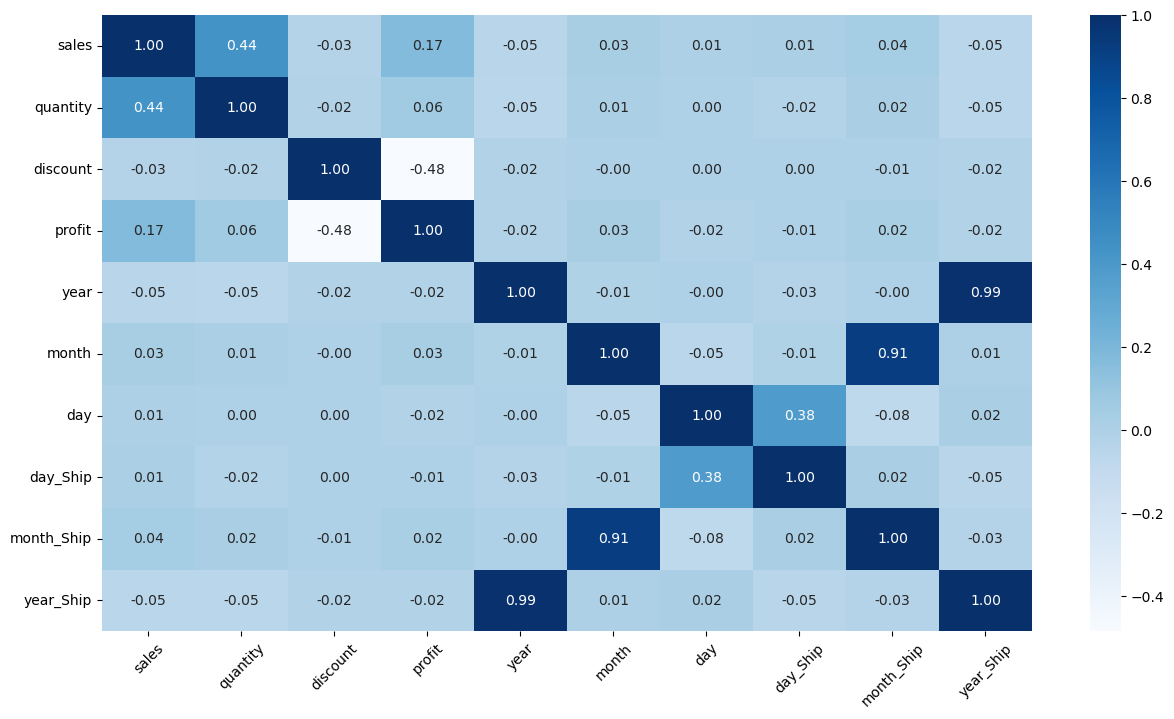

In [66]:
plt.figure(figsize = (15, 8))
sns.heatmap(df_machine.corr(), cmap = 'Blues', annot = True, fmt = '.2f')
plt.xticks(rotation=45)


In [67]:
x_train.drop(columns=['year_Ship' , 'day_Ship' , 'month_Ship'] , inplace=True) # having multicollinearit
x_test.drop(columns=['year_Ship' , 'day_Ship' , 'month_Ship'] , inplace=True) # having multicollinearit



### encoding

In [68]:
num_col = x_train.select_dtypes(exclude=['object']).columns

cat_col = x_train.select_dtypes(include=['object']).columns

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from category_encoders import BinaryEncoder
preproceesor = ColumnTransformer([("num", RobustScaler(), num_col), ("cat", BinaryEncoder(), cat_col)])
x_train_pre  = preproceesor.fit_transform(x_train)
x_test_pre = preproceesor.transform(x_test)


In [70]:
for col in x_train.columns:
     px.scatter(df_machine, x=col , y='sales').show()

### linear regression

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import  cross_val_score

lr = LinearRegression()
scores_lr = cross_val_score(lr, x_train_pre, y_train, cv=5 , scoring='r2')


print(scores_lr)
print(scores_lr.mean())


[0.46664447 0.28206215 0.30210784 0.41628901 0.45268857]
0.38395840923869173


In [72]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
scores_poly  = cross_val_score(lr ,poly.fit_transform(x_train_pre),  y_train, cv=5 , scoring='r2')
print(scores_poly)
print(scores_poly.mean())


[-15.23665036  -8.04685001 -87.90786839 -25.07680306  -3.61047349]
-27.97572906290464


In [73]:
from sklearn.svm import SVR
sv = SVR()
scores_svr = cross_val_score(sv, x_train_pre, y_train, cv=5 , scoring='r2')
print(scores_svr)
print(scores_svr.mean())


[-0.00892828  0.00832179 -0.02365952 -0.08610171  0.04572279]
-0.012928985494243483


In [74]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
scores_knn = cross_val_score(knn, x_train_pre, y_train, cv=5 , scoring='r2')
print(scores_knn)
print(scores_knn.mean())

[0.60867232 0.58529428 0.60944234 0.63591826 0.7152354 ]
0.6309125191658602


In [75]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
scores_tree = cross_val_score(dt, x_train_pre, y_train, cv=5 , scoring='r2')
print(scores_tree)
print(scores_tree.mean())

[0.09316713 0.02152047 0.38120783 0.59091135 0.53955988]
0.32527333143769654


In [76]:

from xgboost import XGBRegressor
xgb = XGBRegressor()
scores_xgb = cross_val_score(xgb, x_train_pre, y_train, cv=5 , scoring='r2' )
print(scores_xgb)
print(scores_xgb.mean())

[0.51822661 0.58470605 0.67223908 0.67617377 0.76191301]
0.6426517062864826


In [77]:
# random forest

from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor()
xgb.fit(x_train_pre, y_train)

scores_forest = cross_val_score(rf, x_train_pre, y_train, cv=5 , scoring='r2')
print(scores_forest)
print(scores_forest.mean())

[0.6796006  0.62675714 0.69091839 0.70777765 0.71141975]
0.6832947052942977


In [78]:
# GRID SEARCH FOR random forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the model
rf = RandomForestRegressor()

rf.fit(x_train_pre, y_train)
# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [100],  # Number of trees in the forest
    'max_depth': [ 10 , 20 ,30],  # Maximum depth of the tree
    'min_samples_split': [2],  
}

# Set up the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train_pre, y_train)

# Print the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best R^2 Score: ", grid_search.best_score_)
#0.8709556979977731


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best R^2 Score:  0.6992191209786884


In [79]:
#Bayesian Regression

from sklearn.linear_model import BayesianRidge

bay = BayesianRidge()
scoresbayes = cross_val_score(bay, x_train_pre, y_train, cv=5 , scoring='r2')
print(scoresbayes)
print(scoresbayes.mean())

[0.47259275 0.29215634 0.30256643 0.41013911 0.46288809]
0.3880685449945874


In [80]:
# lasso model 

from sklearn.linear_model import Lasso

lasso = Lasso()

scores_lasso = cross_val_score(lasso, x_train_pre, y_train, cv=5 , scoring='r2')
print(scores_lasso)
print(scores_lasso.mean())

[0.47442873 0.29593919 0.30656518 0.41676445 0.46550951]
0.391841411102546


### conlusion

In [81]:
scores = pd.DataFrame({'model' : ['Linear Regression' , 'Polynomial Regression' , 'SVR' , 'KNN' , 'Decision Tree' , 'XGBoost' , 'Random Forest' , 'Bayesian Regression'],
                       'scores' : [scores_lr.mean() , scores_poly.mean() , scores_svr.mean() ,
                                    scores_knn.mean() , scores_tree.mean() , scores_xgb.mean() , scores_forest.mean() ,
                                    scoresbayes.mean() ]})
scores 

,model,scores
0,Linear Regression,0.383958
1,Polynomial Regression,-27.975729
2,SVR,-0.012929
3,KNN,0.630913
4,Decision Tree,0.325273
5,XGBoost,0.642652
6,Random Forest,0.683295
7,Bayesian Regression,0.388069


In [82]:
x_train.head().T

,1975,1569,767,1584,869
ship_mode,First Class,Standard Class,Second Class,Standard Class,First Class
segment,Consumer,Consumer,Home Office,Consumer,Consumer
city,Edmonds,Los Angeles,Seattle,Columbus,Pasadena
state,Washington,California,Washington,Ohio,California
region,West,West,West,East,West
sub-category,Furnishings,Tables,Furnishings,Furnishings,Chairs
quantity,4,2,2,5,2
discount,0.0,0.2,0.0,0.2,0.2
profit,34.8128,-2.9566,22.7136,148.845,-65.0352
year,2017,2017,2015,2017,2014


### best model

In [83]:


rf.fit(x_train_pre, y_train) 
y_pred_test = rf.predict(x_test_pre)
print("R2 Test:", r2_score(y_test, y_pred_test) * 100)  
print("MSE Test:", mean_squared_error(y_test, y_pred_test))  


R2 Test: 71.96164834060149
MSE Test: 85915.16415972458


In [84]:
import pickle

# Save the model
with open('rf1.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)

# Save the preprocessor
with open('preprocessor.pkl', 'wb') as preprocessor_file:  # Corrected variable name
    pickle.dump(preproceesor , preprocessor_file)


In [85]:
new_data = pd.DataFrame({
    'ship_mode' : ['First Class'] ,
    'segment' : ['Consumer'] ,
    'city' : ['Edmonds'] ,
    'state' : ['Washington'] ,
    'region' : ['West'] ,
    
    
    'sub-category' : ['Furnishings'] ,
    'quantity' : [3] ,
    'discount' : [0.0] ,
    'profit' : [0.0] ,
    'year' : [2018] ,
    'month' : [1] ,
    'day' : [1]
})



transformed_data = preproceesor.transform(new_data)

    
prediction = rf.predict(transformed_data)
print(prediction)

[168.227]


In [86]:
import os

print(os.path.exists(r'E:\depi\rf1.pkl'))  # Should return True if the file exists
print(os.path.exists(r'E:\depi\preprocessor.pkl'))  # Check for the preprocessor as well


True
True


In [87]:
pip install --upgrade scikit-learn joblib numpy


  Using cached numpy-2.1.2-cp311-cp311-win_amd64.whl (12.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [88]:
!pip install scikit-learn==<original_version>


The syntax of the command is incorrect.


In [89]:
import os

# Specify the path
preprocessor_path = r'E:\depi\preprocessor.pkl'

# Check if the file exists
if not os.path.exists(preprocessor_path):
    print("Preprocessor file not found!")
else:
    print("Preprocessor file found.")


Preprocessor file found.


In [90]:
import os

print(os.path.exists(r"E:\depi\rf1.pkl"))  # Check if the model file exists
print(os.path.exists(r'E:\depi\preprocessor.pkl'))  # Check if the preprocessor file exists


True
True


In [91]:
import pickle

# Test loading the model
with open(r"E:\depi\rf1.pkl", 'rb') as model_file:
    rf = pickle.load(model_file)
    print("Model loaded successfully:", rf)

# Test loading the preprocessor
with open(r"E:\depi\preprocessor.pkl", 'rb') as preprocessor_file:
    preprocessor = pickle.load(preprocessor_file)
    print("Preprocessor loaded successfully:", preprocessor)


Model loaded successfully: RandomForestRegressor()
Preprocessor loaded successfully: ColumnTransformer(transformers=[('num', RobustScaler(),
                                 Index(['quantity', 'discount', 'profit', 'year', 'month', 'day'], dtype='object')),
                                ('cat', BinaryEncoder(),
                                 Index(['ship_mode', 'segment', 'city', 'state', 'region', 'sub-category'], dtype='object'))])


In [92]:
pip list  # or conda list


Package                       Version
----------------------------- ---------------
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
altair                        4.2.2
anaconda-anon-usage           0.4.3
anaconda-catalogs             0.2.0
anaconda-client               1.11.3
anaconda-cloud-auth           0.1.4
anaconda-navigator            2.5.2
anaconda-project              0.11.1
annotated-types               0.6.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     